In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from utils_plotting import val_map, display_dict
from utils_scaling import fit, plot_contours

import jax.numpy as jnp

In [3]:
df = pd.read_csv("data/sweep.csv")
df_big = pd.read_csv("data/extrapolation.csv")

In [4]:
def get_data(drop_df, key = "train/CrossEntropyLoss"):
    drop_df = drop_df.dropna(subset=[key])

    N = jnp.array(drop_df["params"], dtype=jnp.float32)
    D = jnp.array(drop_df["tokens"], dtype=jnp.float32)
    L = jnp.array(drop_df[key], dtype=jnp.float32)
    return N, D, L


Data = smollm-corpus
Loss: 9.881331156170213e-06
A = 77882957.0769991, B = 1062913008.532086, E = 1.5340203711959466, alpha = 0.41811955216504054, beta = 0.45490377291583667
G = 0.01549570859646989, a = 0.5210671466008016, b = 0.47893285339919844
Data = fineweb-edu-100b
Loss: 7.92450060588217e-06
A = 66798878.45905815, B = 889955656.4320827, E = 1.9669051342679635, alpha = 0.4128980698285724, beta = 0.45558129866811403
G = 0.012577035523385167, a = 0.5245735422094281, b = 0.47542645779057185
Data = slimpajama-chunk1
Loss: 7.801392065277136e-06
A = 74673473.63316469, B = 1064203126.3602942, E = 1.9672370351123856, alpha = 0.4012666686140908, beta = 0.43405859895007043
G = 0.016490375164316104, a = 0.5196282404048438, b = 0.4803717595951562
Data = fineweb-100b
Loss: 7.216911522038606e-06
A = 67873108.54367575, B = 931025251.4924387, E = 2.1700144171656954, alpha = 0.41072325854631786, beta = 0.45308760854630176
G = 0.012241320513350945, a = 0.5245217741602234, b = 0.4754782258397766
Data

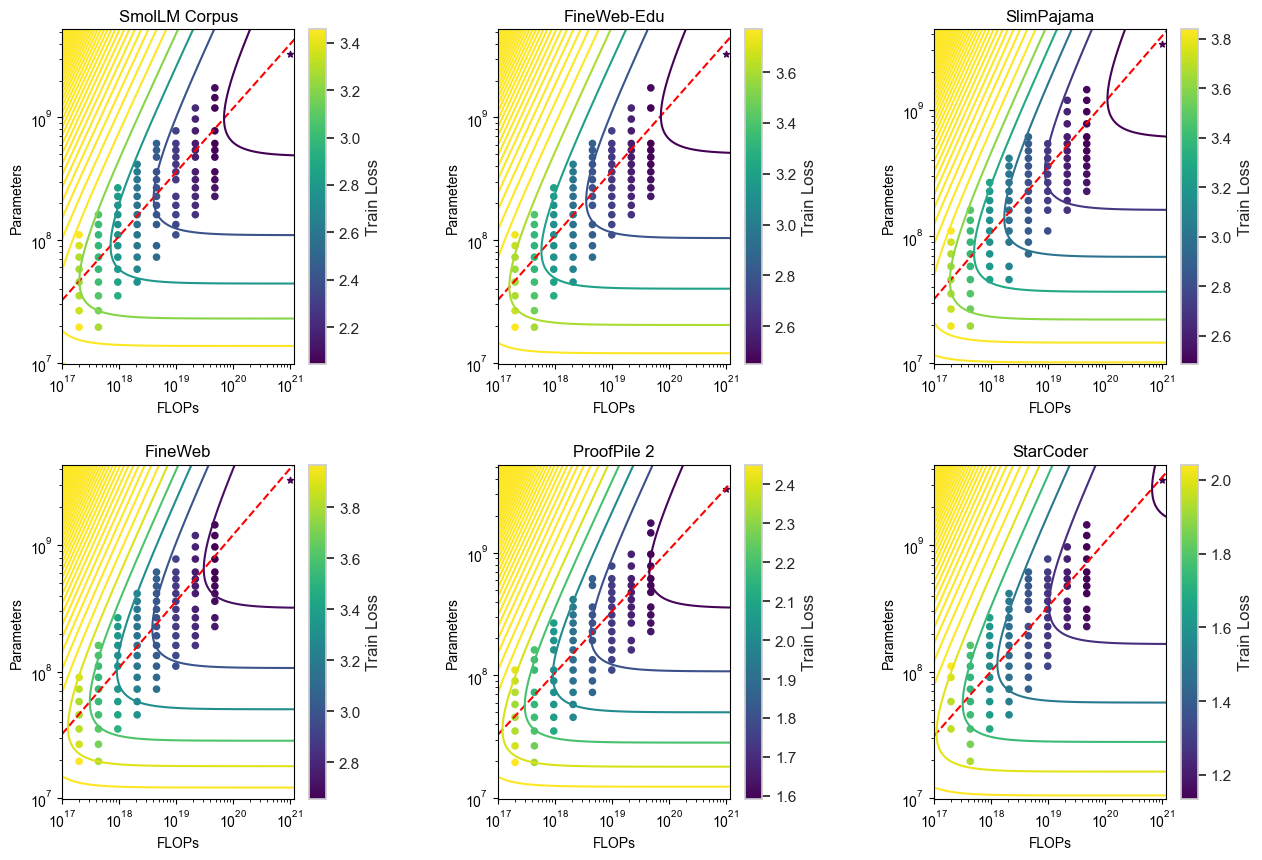

Data = smollm-corpus
Loss: 2.241232711144815e-06
A = 2439.8335848803763, B = 6916.032588373108, E = 1.5515050666629593, alpha = 0.4476990309586343, beta = 0.4436429165235239
G = 0.31388928464960475, a = 0.4977247147143876, b = 0.5022752852856123
Data = fineweb-edu-100b
Loss: 1.7403793220664928e-06
A = 2517.506177974272, B = 7160.5596829948545, E = 2.002191409489778, alpha = 0.45401922795901956, beta = 0.4494721896113453
G = 0.31795771670484396, a = 0.49748362947381286, b = 0.5025163705261873
Data = slimpajama-chunk1
Loss: 1.5198910903806237e-06
A = 2048.3539339495346, B = 6018.806526520867, E = 2.0068496071220574, alpha = 0.44091634411915875, beta = 0.43849091762026093
G = 0.29541165814840276, a = 0.4986209879060468, b = 0.5013790120939532
Data = fineweb-100b
Loss: 1.4105020623875686e-06
A = 1636.5843435210331, B = 4198.638775040238, E = 2.1471759753034596, alpha = 0.4267220125012678, beta = 0.421205669668254
G = 0.3342806255334625, a = 0.4967471619638012, b = 0.5032528380361987
Data =

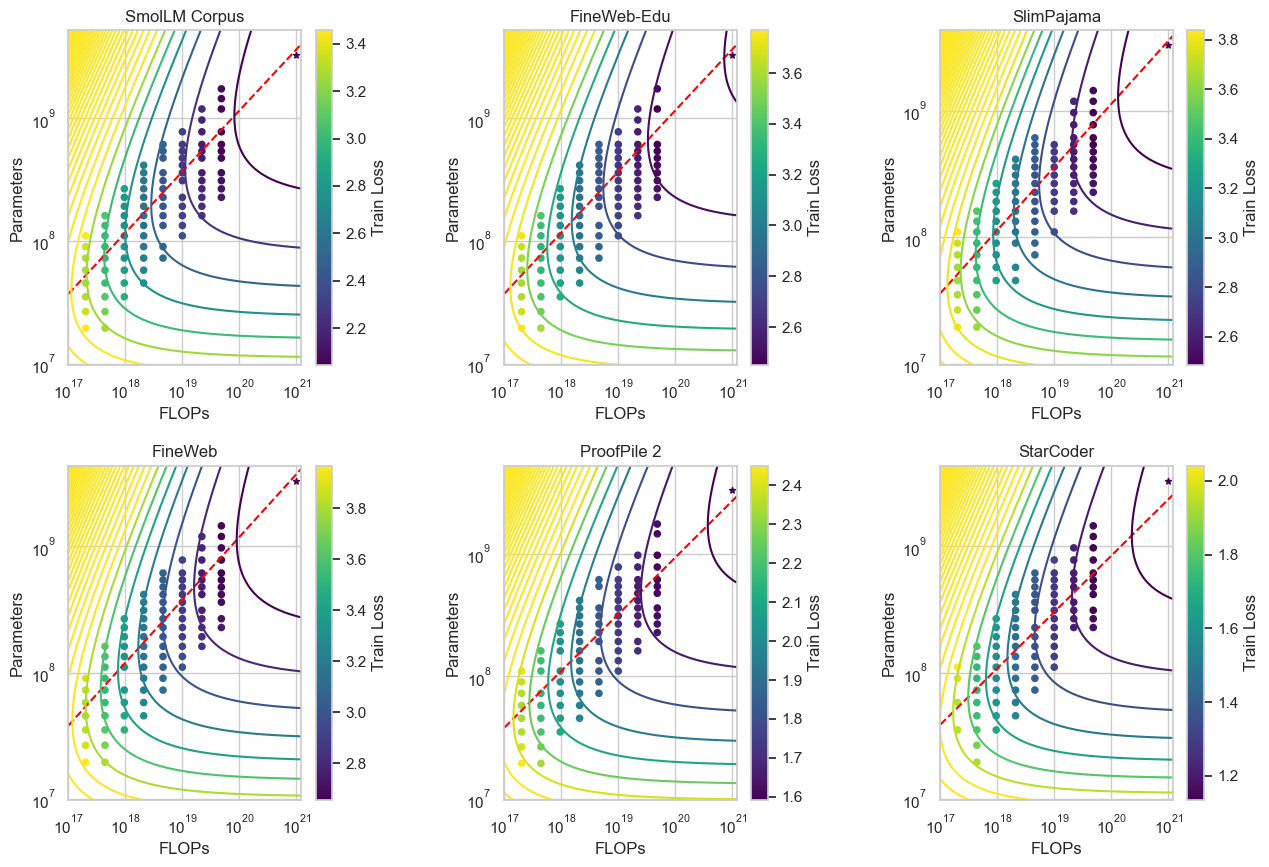

In [5]:
plot_params_df = pd.DataFrame()
for kaplan in [True, False]:
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.3, wspace=0.5)
    sns.set(style="whitegrid")
    axs = axs.flatten()
    for i, data in enumerate(val_map.keys()):
        for loss_name in ["val_loss"]:
            ax = axs[i]
            print(f"Data = {data}")

            drop_df = df[df["data"] == data]

            N, D, L = get_data(drop_df, loss_name)

            params, _ = fit(N, D, L, kaplan=kaplan)
            print(f"Loss: {params['loss']}")

            df_big_data = df_big[df_big["data"] == data]
            x = np.array(df_big_data["iso_flop"])
            y = np.array(df_big_data["params"])
            z = np.array(df_big_data["val_loss"])
            extrapolation = (x,y,z)
            masks = np.ones(5)
            vals = np.zeros(5)
            plot_contours(ax, N, D, L, params, masks, vals, extrapolation, kaplan=kaplan)
            ax.set_title(f"{display_dict[data]}")

            params["kaplan"] = kaplan
            params["data"] = data
            params["loss_name"] = val_map[data]
            params = pd.DataFrame([params.values], columns=params.index, index = [i])
            plot_params_df = pd.concat([plot_params_df, params])

    plt.savefig(f"figures/all_curves_{'kaplan' if kaplan else 'chinchilla'}.pdf", bbox_inches='tight')
    plt.show()

In [6]:
# latex tabel of params
for kaplan in [True, False]:
    for i, data in enumerate(val_map.keys()):
        a, b, e, alpha, beta = plot_params_df[(plot_params_df["data"] == data) & (plot_params_df["kaplan"] == kaplan)].values[0][:5]
        print(f"{display_dict[data]} & {a:.2e} & {b:.2e} & {e:.2f} & {alpha:.2f} & {beta:.2f} & {beta / (alpha + beta):.2f} \\\\")
    print()

SmolLM Corpus & 7.79e+07 & 1.06e+09 & 1.53 & 0.42 & 0.45 & 0.52 \\
FineWeb-Edu & 6.68e+07 & 8.90e+08 & 1.97 & 0.41 & 0.46 & 0.52 \\
SlimPajama & 7.47e+07 & 1.06e+09 & 1.97 & 0.40 & 0.43 & 0.52 \\
FineWeb & 6.79e+07 & 9.31e+08 & 2.17 & 0.41 & 0.45 & 0.52 \\
ProofPile 2 & 2.14e+07 & 3.29e+08 & 1.32 & 0.45 & 0.46 & 0.50 \\
StarCoder & 2.23e+07 & 3.78e+08 & 0.85 & 0.45 & 0.47 & 0.51 \\

SmolLM Corpus & 2.44e+03 & 6.92e+03 & 1.55 & 0.45 & 0.44 & 0.50 \\
FineWeb-Edu & 2.52e+03 & 7.16e+03 & 2.00 & 0.45 & 0.45 & 0.50 \\
SlimPajama & 2.05e+03 & 6.02e+03 & 2.01 & 0.44 & 0.44 & 0.50 \\
FineWeb & 1.64e+03 & 4.20e+03 & 2.15 & 0.43 & 0.42 & 0.50 \\
ProofPile 2 & 3.77e+03 & 3.59e+03 & 1.33 & 0.51 & 0.43 & 0.46 \\
StarCoder & 7.75e+03 & 4.19e+03 & 0.86 & 0.55 & 0.44 & 0.45 \\

